# EDA practice on seaborn dataset "Titanic"

In [1]:
 # importing required libraries 
import pandas as pd # for reading the file dataframe
import numpy as np # numnerical  analysis
import seaborn as sns # ploting distribution graphs
import scipy.stats as stats # Statistical analysis
import matplotlib.pyplot as plt  # graphs ploting 

In [9]:
file_path=r"D:\data sets\titanic.csv" # file location 
df = pd.read_csv(file_path) # reading the file path from local system
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
print("Shape of data set: ",df.shape)
print("Number of rows : ",df.shape[0])
print("Number of colums : ",df.shape[1])

Shape of data set:  (891, 15)
Number of rows :  891
Number of colums :  15


In [40]:
df.info() # all information about the data and their types
# here colums age and deck has null values
# Deck has only information of people of 1st class passenger so you can drop it. there are 203 1st class passengers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [37]:
 # getting the top 5 rows of data
print("Top 5 samples of data \n")
df.head() # you can have to 10 samples as df.head(10)

Top 5 samples of data 



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
# random samples of data, to go through data
df.sample(10) # 10 random sample of data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
802,1,1,male,11.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
570,1,2,male,62.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,yes,True
231,0,3,male,29.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
300,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
207,1,3,male,26.0,0,0,18.7875,C,Third,man,True,NaN,Cherbourg,yes,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
401,0,3,male,26.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
764,0,3,male,16.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df.isnull() # where there are null values there it will show True
# not possible to see the whole data, take a lot of time 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
df.isnull().sum() # instead we can take the sum of null values and know how many null values are present

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
df.duplicated().sum() # total number of dupliated values

107

In [29]:
# checking for duplicate values
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
df_copy=df.copy() # making a copy of the raw datasets so that any changes doesnt effect the orginal data

In [54]:
df_copy.drop_duplicates(keep='first',inplace=True)  # Droping the duplicates values to avoid errors

In [63]:
df_copy.drop(columns='who',inplace=True) # dropping columns which have same values in different data types

In [69]:
df_copy.drop(columns='embarked',inplace=True)

In [124]:
df_copy.drop(columns='class',inplace=True)
df_copy.drop(columns='deck',inplace=True)
df_copy.drop(columns='survived',inplace=True)
df_copy.drop(columns='alone',inplace=True)

In [126]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       784 non-null    int64  
 1   sex          784 non-null    object 
 2   age          678 non-null    float64
 3   sibsp        784 non-null    int64  
 4   parch        784 non-null    int64  
 5   fare         784 non-null    float64
 6   adult_male   784 non-null    bool   
 7   embark_town  782 non-null    object 
 8   alive        784 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 72.1+ KB


750

In [70]:
df_copy.sample(25) # top 25 random sample to check the data

,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alive,alone
608,2,female,22.0,1,2,41.5792,Second,False,Cherbourg,yes,False
453,1,male,49.0,1,0,89.1042,First,True,Cherbourg,yes,False
585,1,female,18.0,0,2,79.6500,First,False,Southampton,yes,False
548,3,male,33.0,1,1,20.5250,Third,True,Southampton,no,False
162,3,male,26.0,0,0,7.7750,Third,True,Southampton,no,True
467,1,male,56.0,0,0,26.5500,First,True,Southampton,no,True
536,1,male,45.0,0,0,26.5500,First,True,Southampton,no,True
541,3,female,9.0,4,2,31.2750,Third,False,Southampton,no,False
645,1,male,48.0,1,0,76.7292,First,True,Cherbourg,yes,False
123,2,female,32.5,0,0,13.0000,Second,False,Southampton,yes,True


In [127]:
df_copy

,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alive
0,3,male,22.0,1,0,7.2500,True,Southampton,no
1,1,female,38.0,1,0,71.2833,False,Cherbourg,yes
2,3,female,26.0,0,0,7.9250,False,Southampton,yes
3,1,female,35.0,1,0,53.1000,False,Southampton,yes
4,3,male,35.0,0,0,8.0500,True,Southampton,no
...,...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,False,Queenstown,no
887,1,female,19.0,0,0,30.0000,False,Southampton,yes
888,3,female,NaN,1,2,23.4500,False,Southampton,no
889,1,male,26.0,0,0,30.0000,True,Cherbourg,yes


In [77]:
df_copy.describe().T # describtion of the data 

,count,mean,std,min,25%,50%,75%,max
pclass,784.0,2.243622,0.855056,1.00,1.00,3.00,3.00000,3.0000
age,678.0,29.869351,14.759076,0.42,20.00,28.25,39.00000,80.0000
sibsp,784.0,0.522959,0.986231,0.00,0.00,0.00,1.00000,8.0000
parch,784.0,0.415816,0.836922,0.00,0.00,0.00,1.00000,6.0000
fare,784.0,34.711740,52.160151,0.00,8.05,15.90,34.10935,512.3292


In [78]:
df_copy.cov() # covariance of data

C:\Users\abhig\AppData\Local\Temp\ipykernel_25748\910293836.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.cov()


,pclass,age,sibsp,parch,fare,adult_male
pclass,0.731121,-4.620064,0.074221,0.028837,-24.494973,0.028258
age,-4.620064,217.830338,-4.395547,-2.503280,73.890728,2.168992
sibsp,0.074221,-4.395547,0.972652,0.314834,6.952224,-0.133914
parch,0.028837,-2.503280,0.314834,0.700439,8.379058,-0.143721
fare,-24.494973,73.890728,6.952224,8.379058,2720.681373,-4.262292
adult_male,0.028258,2.168992,-0.133914,-0.143721,-4.262292,0.244649


In [79]:
df_copy.corr() # corealation of data how each column is realted to other in statistical way

C:\Users\abhig\AppData\Local\Temp\ipykernel_25748\382007831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,pclass,age,sibsp,parch,fare,adult_male
pclass,1.000000,-0.369361,0.088014,0.040296,-0.549216,0.066816
age,-0.369361,1.000000,-0.315116,-0.195036,0.092707,0.296095
sibsp,0.088014,-0.315116,1.000000,0.381433,0.135147,-0.274521
parch,0.040296,-0.195036,0.381433,1.000000,0.191942,-0.347186
fare,-0.549216,0.092707,0.135147,0.191942,1.000000,-0.165209
adult_male,0.066816,0.296095,-0.274521,-0.347186,-0.165209,1.000000


C:\Users\abhig\AppData\Local\Temp\ipykernel_25748\2403417456.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(),annot=True)


<Axes: >

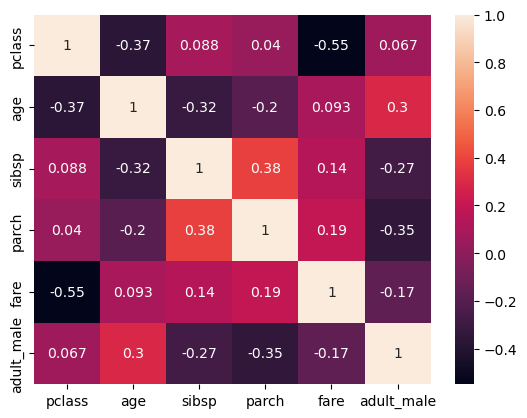

In [80]:
# heatmap of correalation 
sns.heatmap(df_copy.corr(),annot=True)

In [81]:
[col for col in df_copy.columns if df_copy[col].dtype=='O']

['sex', 'class', 'embark_town', 'alive']

C:\Users\abhig\AppData\Local\Temp\ipykernel_25748\2241494692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_copy['age'])


<Axes: ylabel='Density'>

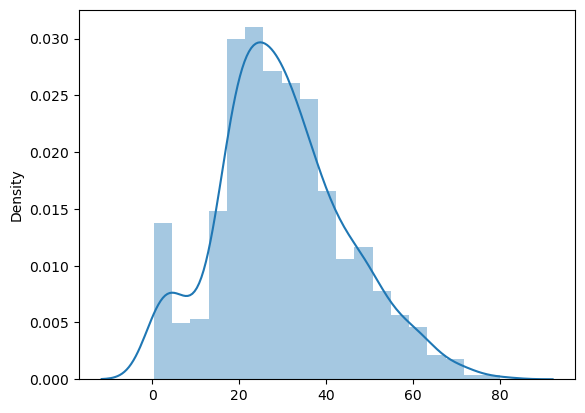

In [87]:
sns.distplot(x=df_copy['age']) # distribution plot

<Axes: xlabel='alive', ylabel='count'>

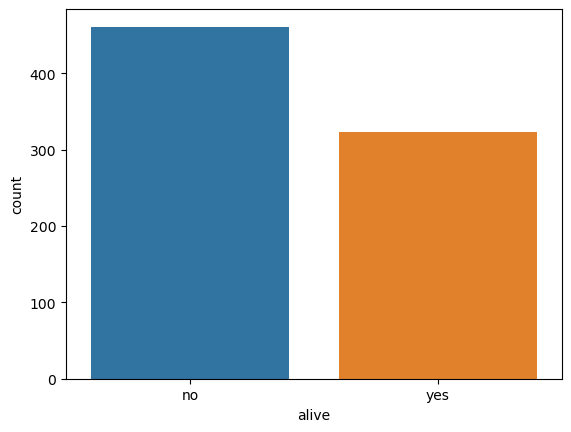

In [93]:
sns.countplot(x=df_copy['alive']) # count plot which counts the values agains given column

<Axes: xlabel='age', ylabel='fare'>

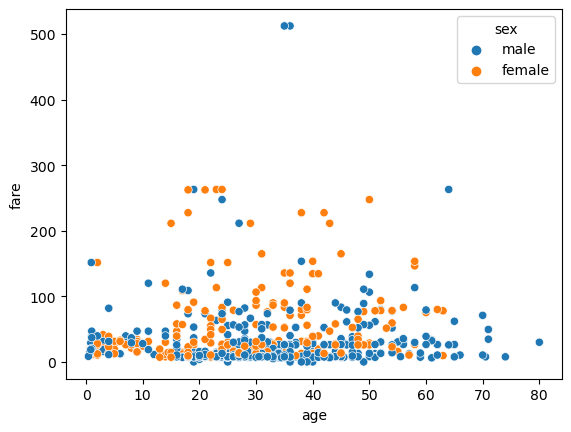

In [101]:
sns.scatterplot(df_copy,x='age',y='fare',hue='sex') # scater plot to check fare against age and their sex

# in graph you can see 2 males around 30 35 have given the highest fare amount

In [129]:
df_copy

,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alive
0,3,male,22.0,1,0,7.2500,True,Southampton,no
1,1,female,38.0,1,0,71.2833,False,Cherbourg,yes
2,3,female,26.0,0,0,7.9250,False,Southampton,yes
3,1,female,35.0,1,0,53.1000,False,Southampton,yes
4,3,male,35.0,0,0,8.0500,True,Southampton,no
...,...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,False,Queenstown,no
887,1,female,19.0,0,0,30.0000,False,Southampton,yes
888,3,female,NaN,1,2,23.4500,False,Southampton,no
889,1,male,26.0,0,0,30.0000,True,Cherbourg,yes


<Axes: xlabel='age', ylabel='sex'>

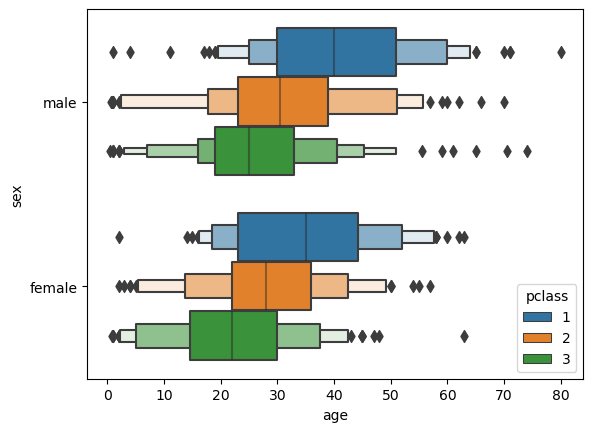

In [104]:
sns.boxenplot(df_copy,x='age',y='sex',hue='pclass') # box plot to check age of passengers with their sex travelled in which class

<Axes: xlabel='sex', ylabel='age'>

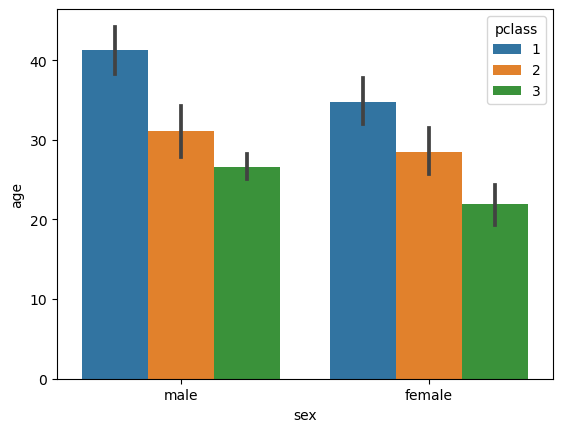

In [106]:
sns.barplot(df_copy,y='age',x='sex',hue='pclass') # bar plot to check how many passengers have travelled in different class with respect to sex and their age

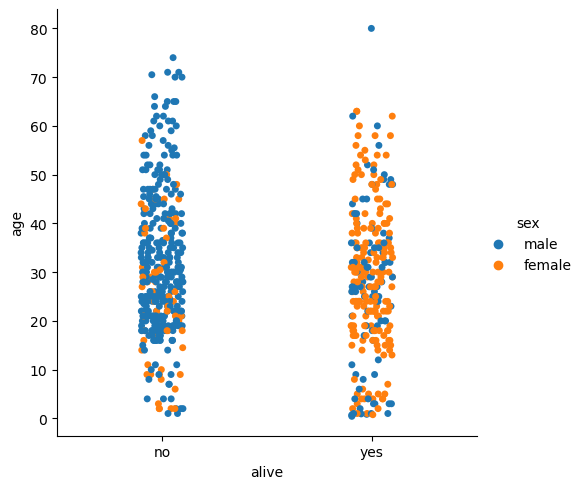

In [112]:
sns.catplot(df_copy,y='age',x='alive',hue='sex')
# categoricla plot 
# in this ypu can conclude, female have survived more and one male of age 82 has also survived 
# # most of the male deaths are btw age 15-50 

<Axes: xlabel='alive', ylabel='age'>

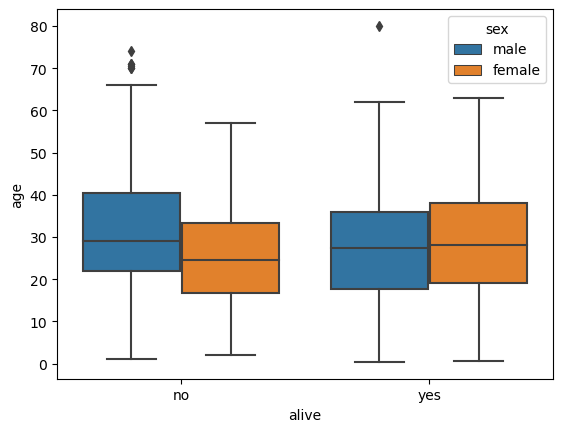

In [119]:
sns.boxplot(df_copy,y='age',x='alive',hue='sex')

In [125]:
df_copy

,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alive
0,3,male,22.0,1,0,7.2500,True,Southampton,no
1,1,female,38.0,1,0,71.2833,False,Cherbourg,yes
2,3,female,26.0,0,0,7.9250,False,Southampton,yes
3,1,female,35.0,1,0,53.1000,False,Southampton,yes
4,3,male,35.0,0,0,8.0500,True,Southampton,no
...,...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,False,Queenstown,no
887,1,female,19.0,0,0,30.0000,False,Southampton,yes
888,3,female,NaN,1,2,23.4500,False,Southampton,no
889,1,male,26.0,0,0,30.0000,True,Cherbourg,yes


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


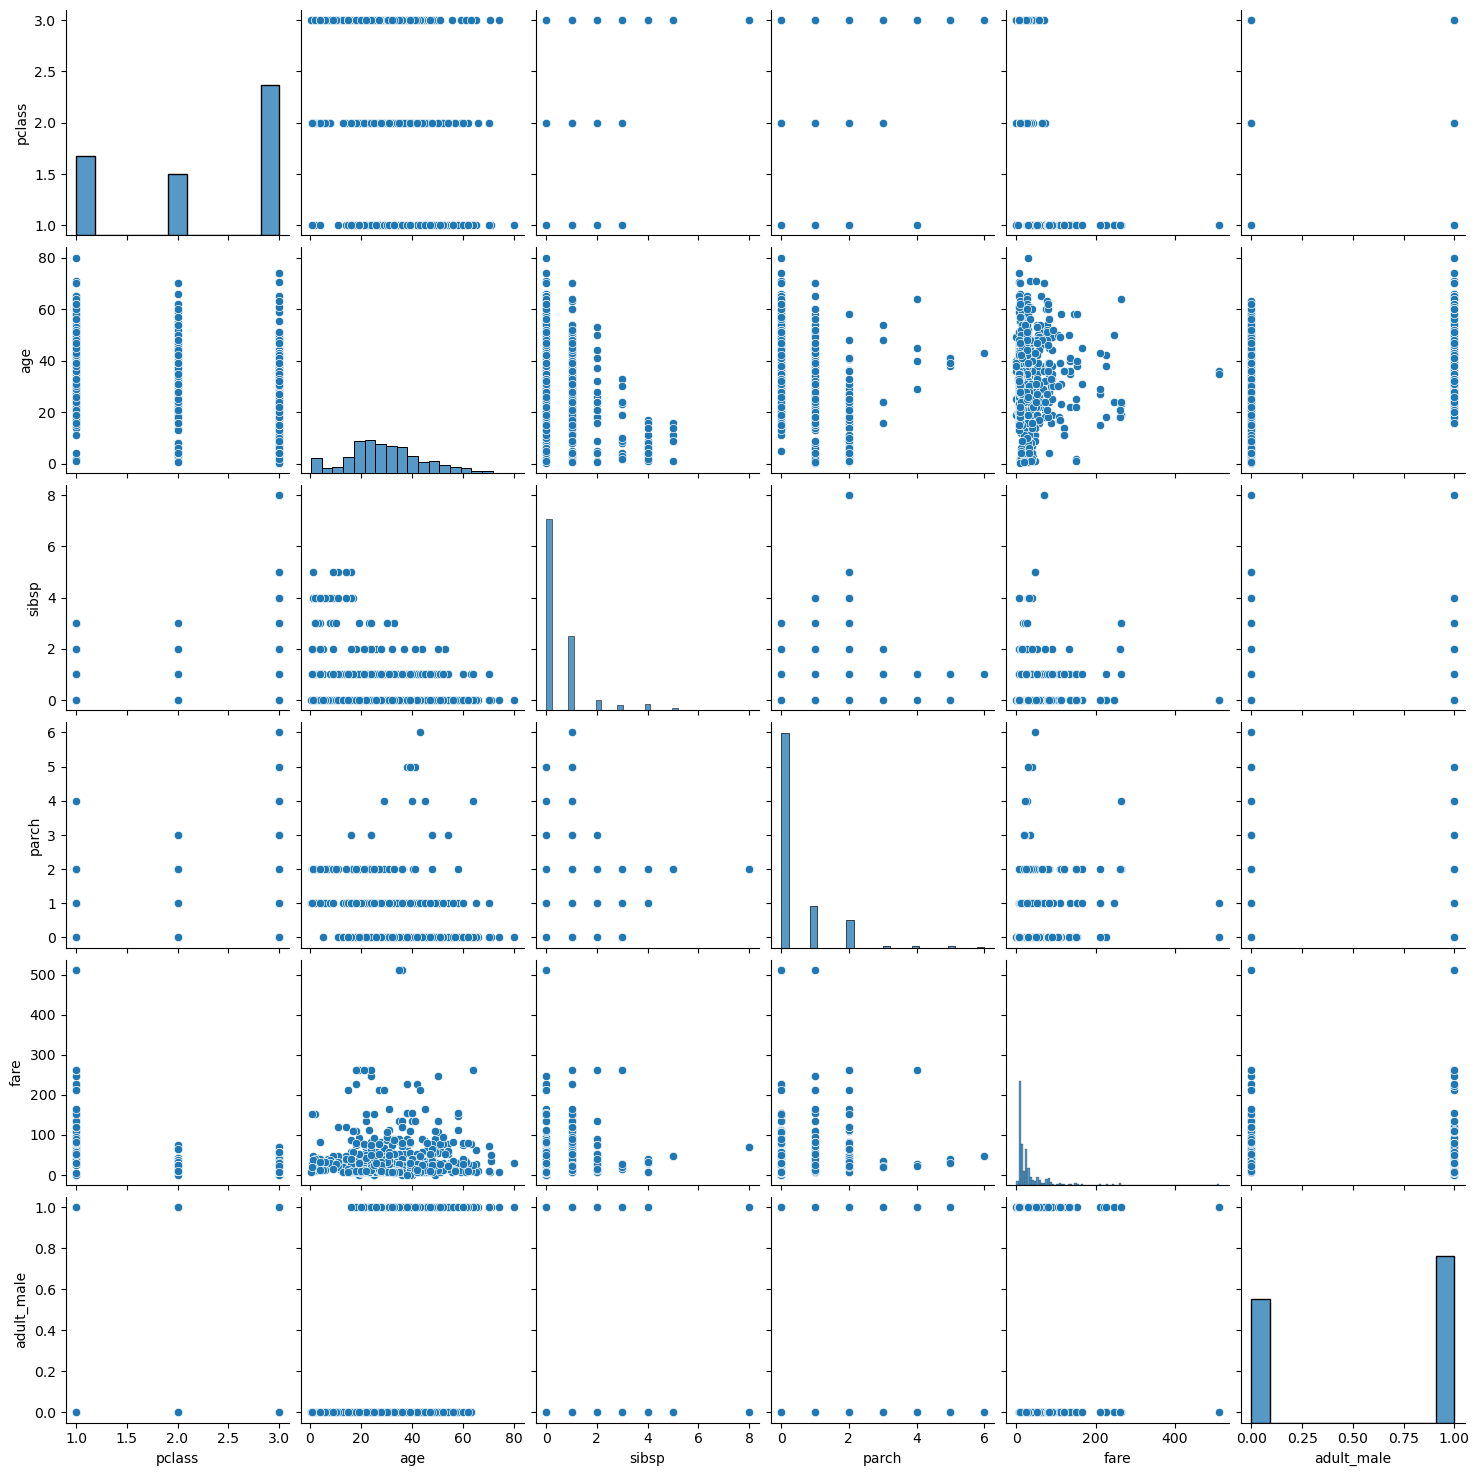

In [123]:
sns.pairplot(df_copy)